In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

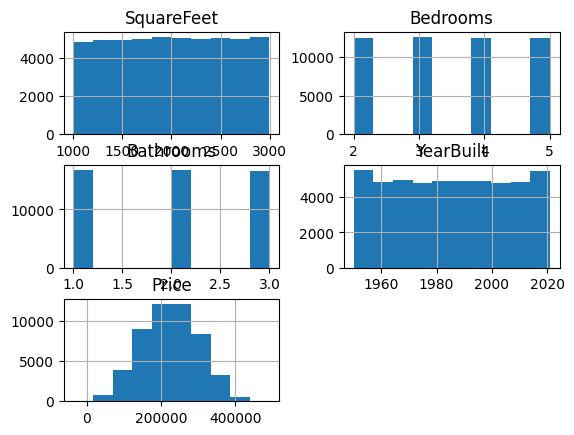

In [6]:
df.hist()

In [7]:
df[df.Price < 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [8]:
df = df[~(df.Price < 0)]

In [9]:
df[(df.Price < 0)]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49978 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    49978 non-null  int64  
 1   Bedrooms      49978 non-null  int64  
 2   Bathrooms     49978 non-null  int64  
 3   Neighborhood  49978 non-null  object 
 4   YearBuilt     49978 non-null  int64  
 5   Price         49978 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.7+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Neighborhood"] = encoder.fit_transform(df["Neighborhood"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49978 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    49978 non-null  int64  
 1   Bedrooms      49978 non-null  int64  
 2   Bathrooms     49978 non-null  int64  
 3   Neighborhood  49978 non-null  int64  
 4   YearBuilt     49978 non-null  int64  
 5   Price         49978 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


In [15]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


<Axes: >

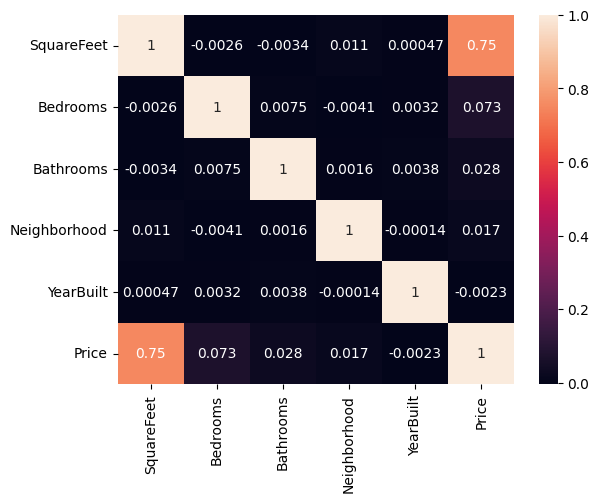

In [16]:
sns.heatmap(df.corr(),annot = True)

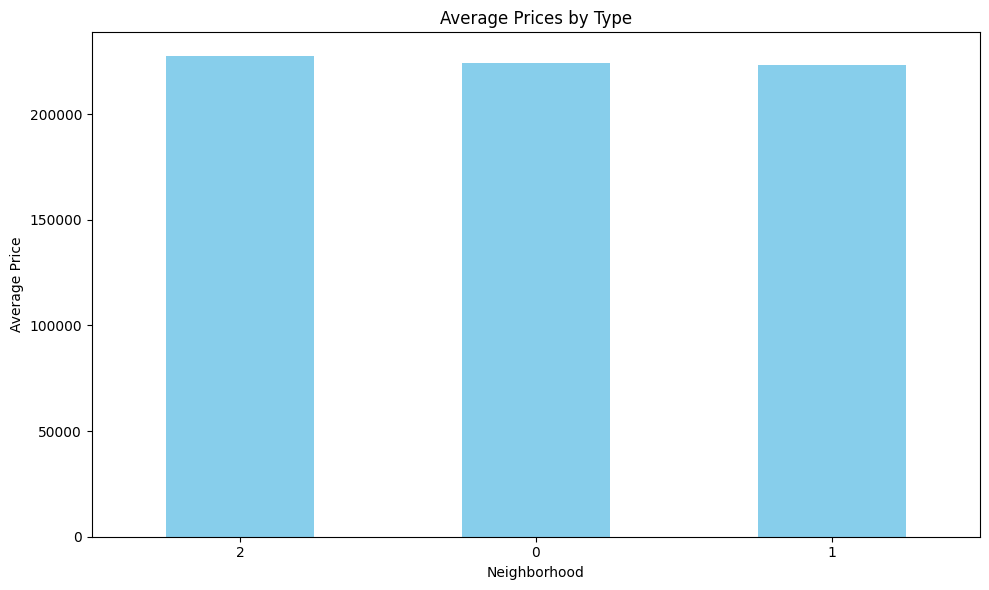

In [17]:
average_prices = df.groupby('Neighborhood')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Type')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
df.drop("Neighborhood",axis = True,inplace = True)

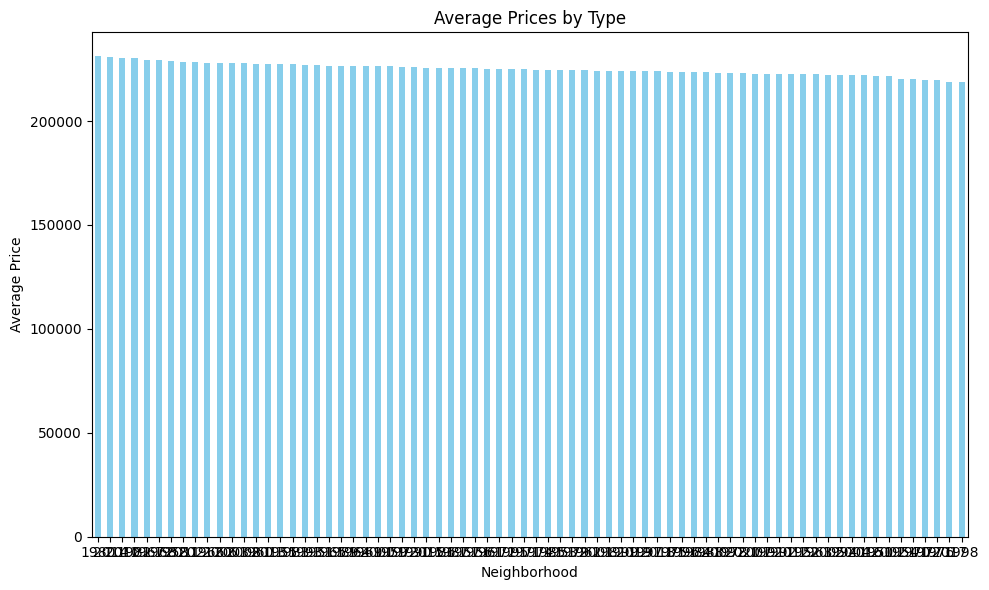

In [19]:
average_prices = df.groupby('YearBuilt')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Type')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
df.drop("YearBuilt",axis = True,inplace = True)

In [21]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065


In [22]:
X = df.drop("Price",axis = 1)
y = df["Price"]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

print(f"The Test acc: {model.score(X_test,y_test)*100}")

The Test acc: 57.76950708108431


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,make_scorer
model2 = XGBRegressor()

model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print(f"RMSE: {mean_squared_error(y_pred,y_test,squared = False)}")

RMSE: 49961.200113529885


In [26]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

print(f"RMSE: {mean_squared_error(y_pred,y_test,squared = False)}")

RMSE: 49490.260063580055
